In [2]:
import pandas as pd
import database as db
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import pony.orm as porm

In [3]:
db.set_up_connection(db.db, 'db_weather', user = 'webscrapers', password = 'bCCnw3b')


In [4]:
query = db.DailyMeasurement.select(lambda m: 'Berlin' in m.station.stationsname 
                                   and m.mess_datum == datetime.date(2018,5,1)).get_sql()

In [5]:
berlin_may1_2018 = pd.read_sql(query, db.conn_url)

In [6]:
query = db.DailyMeasurement.select(lambda m: 'Frankfurt' in m.station.stationsname and 
                                   m.mess_datum >= datetime.date(2018,2,1) and m.mess_datum < datetime.date(2018,5,1)).get_sql()

In [7]:
frankfurt_feb_may2018 = pd.read_sql(query, db.conn_url)

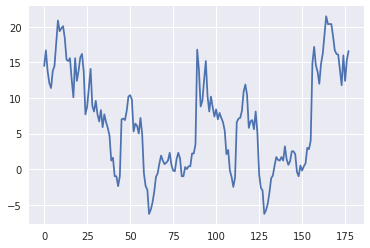

In [8]:
#plotting maximum temperature from feb to may 2018
plt.plot(frankfurt_feb_may2018['tmk']) # but we might want to plot an average of different stations 

In [9]:
# plotting max temperature by taking average over station ids
frankfurt_feb_may2018[['mess_datum', 'station', 'tmk']]

,mess_datum,station,tmk
0,2018-04-30,1420,14.5
1,2018-04-29,1420,16.7
2,2018-04-28,1420,13.8
3,2018-04-27,1420,12.1
4,2018-04-26,1420,11.4
5,2018-04-25,1420,13.8
6,2018-04-24,1420,14.5
7,2018-04-23,1420,17.8
8,2018-04-22,1420,20.9
9,2018-04-21,1420,19.4


In [10]:
frankfurt_feb_may2018[['mess_datum','station']]

,mess_datum,station
0,2018-04-30,1420
1,2018-04-29,1420
2,2018-04-28,1420
3,2018-04-27,1420
4,2018-04-26,1420
5,2018-04-25,1420
6,2018-04-24,1420
7,2018-04-23,1420
8,2018-04-22,1420
9,2018-04-21,1420


In [11]:
frankfurt_feb_may2018.loc[frankfurt_feb_may2018['mess_datum']==datetime.date(2018,3,9)]

,mess_datum,stations_id,station,qn_3,fx,fm,qn_4,rsk,rskf,sdk,shk_tag,nm,vpm,pm,tmk,upm,txk,tnk,tgk
52,2018-03-09,1420,1420,3.0,8.2,2.1,3,9.5,6.0,0.0,0.0,7.3,8.2,996.04,5.3,91.17,8.5,1.1,-1.1
119,2018-03-09,1424,1424,NaN,NaN,NaN,3,6.3,4.0,NaN,NaN,NaN,8.6,NaN,5.8,91.83,8.0,2.9,0.8


In [132]:
##Something I tried but not needed

from datetime import datetime, timedelta
from collections import OrderedDict


def labels_month_year(dates):
    '''Takes list of strings of date of length 2 which is the start date and end date
    and gives label months in this period '''
    start, end = [datetime.strptime(_, "%Y-%m-%d") for _ in dates]
    labels = list(OrderedDict(((start + timedelta(_)).strftime(r"%b-%y"), None) for _ in range((end - start).days)).keys())

    return labels

def extract_start_end_dates(df):
    '''Takes dataframe and gives the start and end dates'''
    dates = [df.mess_datum.min().isoformat(), df.mess_datum.max().isoformat()]
    return dates



In [133]:
group_ondates = frankfurt_feb_may2018.groupby(['mess_datum'])
means_ondates = group_ondates.mean()

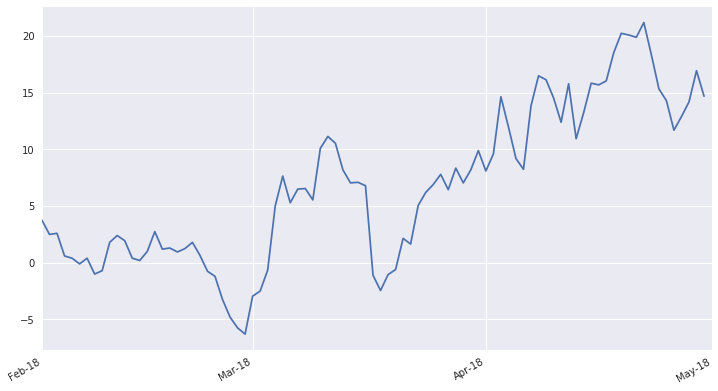

In [134]:
import numpy as np
import matplotlib.dates as mdates


years = mdates.YearLocator()   # every year
months = mdates.MonthLocator() # every month
dates = mdates.DateLocator() #every date
yearsFmt = mdates.DateFormatter(r"%b-%y")

fig, ax = plt.subplots(figsize = (12,7))
ax.plot(means_ondates['tmk'])

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)
#ax.xaxis.set_minor_locator() #will be useful if many years and we want months to be minor grid location

datemin = np.datetime64(means_ondates.tmk.keys()[0], 'M')
datemax = np.datetime64(means_ondates.tmk.keys()[-1], 'M') + np.timedelta64(1, 'M')
ax.set_xlim(datemin, datemax)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
